In [23]:
import numpy as np 
import pandas as pd 

In [24]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

In [25]:
x = x.reshape(len(x))

In [26]:
df = pd.DataFrame({'X_Val' : x, 'Y_Val':y})
df

,X_Val,Y_Val
0,0.931280,62.687202
1,0.087047,-23.763981
2,-1.057711,-25.686766
3,0.314247,7.936457
4,-0.479174,-15.475495
...,...,...
95,1.852278,78.854028
96,-1.424748,-82.466409
97,-0.719844,-47.757337
98,-0.072010,11.684240


In [27]:
x = x.reshape(len(x),1)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [29]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(n_estimators = 15, random_state = 42)

In [33]:
trRegress = DecisionTreeRegressor(max_depth=4)
voting_regressor = VotingRegressor(estimators=[('linear', lr), ('tree', trRegress),('forest',RFmodel)])

In [34]:
lr.fit(X_train, y_train)
trRegress.fit(X_train, y_train)
RFmodel.fit(X_train,y_train)
voting_regressor.fit(X_train, y_train)


VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('tree', DecisionTreeRegressor(max_depth=4)),
                            ('forest',
                             RandomForestRegressor(n_estimators=15,
                                                   random_state=42))])

In [35]:
linear_pred = lr.predict(x_test)
tree_pred = trRegress.predict(x_test)
voting_pred = voting_regressor.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
linear_pred = lr.predict(x_test)
tree_pred = trRegress.predict(x_test)
RF_pred = RFmodel.predict(x_test)
voting_pred = voting_regressor.predict(x_test)

In [38]:
print("R2 score for linear regression is: ", r2_score(y_test, linear_pred))
print("R2 score for decision Tree regression is: ", r2_score(y_test, tree_pred))
print("R2 score for random forest regression is: ", r2_score(y_test, RF_pred))
print("R2 score for ensemble regression is: ", r2_score(y_test,voting_pred))

R2 score for linear regression is:  0.7737553963014483
R2 score for decision Tree regression is:  0.7248919316038317
R2 score for random forest regression is:  0.7145761941365718
R2 score for ensemble regression is:  0.7663352604177804


In [39]:
import matplotlib.pyplot as plt

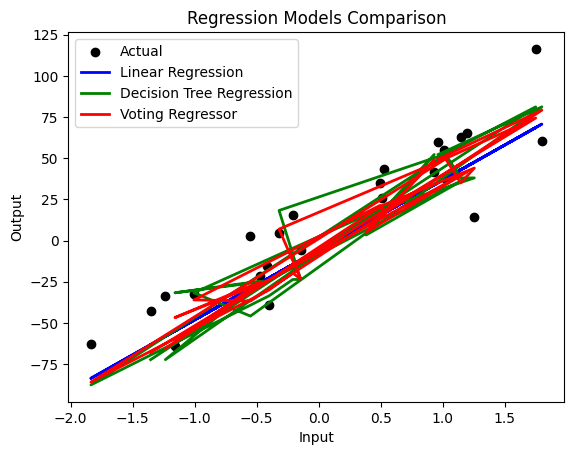

In [43]:
plt.scatter(x_test, y_test, color='black', label='Actual')
plt.plot(x_test, linear_pred, color='blue', linewidth=2, label='Linear Regression')
plt.plot(x_test, tree_pred, color='green', linewidth=2, label='Decision Tree Regression')
plt.plot(x_test, voting_pred, color='red', linewidth=2, label='Voting Regressor')
plt.legend()
plt.title('Regression Models Comparison')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()